In [91]:
"""
    Assignment 5&6
        Class: Intro to Data Analysis (CS6850)
        Instructor: Dr. Hamid Karimi
        Date: March 13, 2024
        Student: Paul Semadeni
"""
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import random
from matplotlib import pyplot

In [65]:
# TODO: Draw the boxplot in Python.
data = np.array([-1,3,7,8,-15,7,2,1,25])
q1 = np.percentile(data, 25)
median = np.median(data)
q3 = np.percentile(data, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data < lower_bound) | (data > upper_bound)]
print("\nQ1:", q1, "\nMedian:", median, "\nQ3:", q3, "\nIQR:", iqr, "\nLower bound:", lower_bound, "\nUpper bound:", upper_bound, "\nOutliers:", outliers)



Q1: 1.0 
Median: 3.0 
Q3: 7.0 
IQR: 6.0 
Lower bound: -8.0 
Upper bound: 16.0 
Outliers: [-15  25]


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d01c166a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d01c370d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d01c16070>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d01c37730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d01c16640>],
 'means': []}

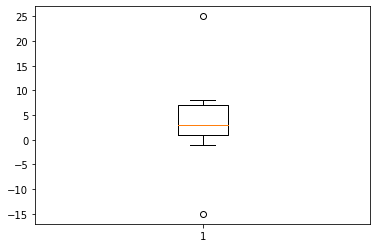

In [66]:
pyplot.boxplot(data)

In [67]:
# TODO: Draw parallel coordinates for vehicles dataset. Show that parallel coordinates are sensitive to the order of attributes by drawing several plots with different orders of columns
with open("./files/vehicles.csv") as file:
    vehicles_df = pd.read_csv(file)
vehicles_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axisrectangular,lengthrectangular,majorvariance,minorvariance,gyrationradius,majorskewness,minorskewness,minorkurtosis,majorkurtosis,hollows_ratio,class
0,95,43,96,202,65,10,189,35,22,143,217,534,166,71,6,27,190,197,opel
1,96,52,104,222,67,9,198,33,23,163,217,589,226,67,12,20,192,201,opel
2,107,52,101,218,64,11,202,33,23,164,219,610,192,65,17,2,197,206,opel
3,97,37,78,181,62,8,161,41,20,131,182,389,117,62,2,28,203,211,opel
4,96,54,104,175,58,10,215,31,24,175,221,682,222,75,13,23,186,194,opel


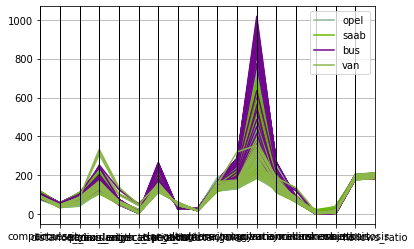

In [68]:
pd.plotting.parallel_coordinates(vehicles_df, "class")

['elongatedness', 'majorkurtosis', 'hollows_ratio', 'minorskewness', 'pr_axis_aspect_ratio', 'scatter_ratio', 'distance_circularity', 'circularity', 'max_length_aspect_ratio', 'gyrationradius', 'minorvariance', 'compactness', 'radius_ratio', 'minorkurtosis', 'majorskewness', 'class', 'lengthrectangular', 'pr_axisrectangular', 'majorvariance']


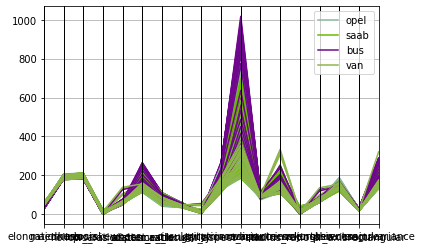

In [69]:
temp_list = list(range(19))
random.shuffle(temp_list)
columns = [vehicles_df.columns[i] for i in temp_list]
print(columns)
reorder_vehicles_df = vehicles_df[columns]
chart = pd.plotting.parallel_coordinates(reorder_vehicles_df, "class")

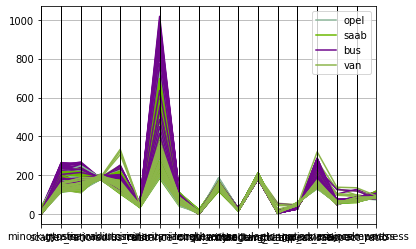

In [70]:
temp_list = list(range(19))
random.shuffle(temp_list)
columns = [columns[i] for i in temp_list]
reorder_vehicles_df = vehicles_df[columns]
chart = pd.plotting.parallel_coordinates(reorder_vehicles_df, "class")

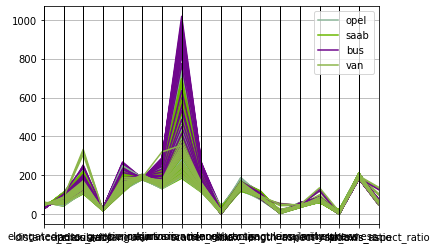

In [71]:
temp_list = list(range(19))
random.shuffle(temp_list)
columns = [columns[i] for i in temp_list]
reorder_vehicles_df = vehicles_df[columns]
chart = pd.plotting.parallel_coordinates(reorder_vehicles_df, "class")

In [72]:
# TODO: Implement the Misra-Gries algorithm in Python and execute it for the stream of tokensin tweet words one week.txt
def misra_gries(k):
    f = open("./files/tweet_words_one_week.txt", "r")
    buffer_dict = dict()
    total_dict = dict()
    m = 0
    n = 0
    while True:
        token = f.readline()
        if not token:
            print("End of the stream")
            break
        # Stream length
        m += 1
        # Add unique items to dictionary, increment non-unique entries
        if token in buffer_dict:
            buffer_dict[token] += 1
        elif len(buffer_dict) < k - 1:
            buffer_dict[token] = 1
            # Unique item count
            n += 1
        else:
            for i in buffer_dict.copy():
                buffer_dict[i] -= 1
                if buffer_dict[i] == 0:
                    buffer_dict.pop(i)
        if token not in total_dict:
            total_dict[token] = 0
        total_dict[token] += 1
    # Calculate false positives
    target_frequency = m / k
    false_positives = 0
    true_positives = 0
    for i in buffer_dict:
        i_frequency = total_dict[i]
        if i_frequency >= target_frequency:
            true_positives += 1
        else:
            false_positives += 1
    print("k:", k, "\nm:", m, "\nn:", n, "\nbuffer:", buffer_dict, "\nnumber of false positives:", false_positives, "\nnumber of true positives:", true_positives)

b = 50
misra_gries(b)
print("Buffer size:", b, "\n")

End of the stream
k: 50 
m: 80910848 
n: 67703661 
buffer: {'atilla\n': 19, 'yayla\n': 19, 'yazarlar\n': 10, 'star\n': 9, 'gazete\n': 9, 'demotivational\n': 16, 'poster\n': 14, 'motivational\n': 13, 'photo\n': 13, 'funny\n': 10, 'grandma\n': 1, 'waitin\n': 1, 'heart\n': 1, 'finally\n': 1, 'chocolate\n': 1, 'cream\n': 1, 'normal\n': 1, 'sucker\n': 1, 'born\n': 1, 'minute\n': 1, 'smell\n': 2, 'dick\n': 1, 'check\n': 1, 'badmotive\n': 1, 'hallo': 1} 
number of false positives: 25 
number of true positives: 0
Buffer size: 50 



In [73]:
# TODO: Run your implementations for buffer sizes {300, 800, 1000, 5000, 10000}, and for each buffer size, calculate the proportion of the false positives.
buffer_sizes = [300, 800, 1000, 5000, 10000]
for b in buffer_sizes:
    misra_gries(b)
    print("Buffer size:", b, "\n")

End of the stream
k: 300 
m: 80910848 
n: 58087293 
buffer: {'people\n': 58162, 'time\n': 134393, 'love\n': 65149, 'video\n': 41997, 'thanks\n': 834, 'happy\n': 1, 'portal\n': 151, 'scdn\n': 151, 'publicou\n': 151, 'matria\n': 152, 'avec\n': 14, 'vous\n': 20, 'pour\n': 44, 'technology\n': 8, 'computer\n': 23, 'statistic\n': 1, 'data\n': 32, 'woman\n': 3, 'american\n': 2, 'student\n': 2, 'right\n': 3, 'araclyla\n': 20, 'bugn\n': 2, 'deil\n': 3, 'atilla\n': 34, 'yayla\n': 34, 'yazarlar\n': 24, 'berat\n': 9, 'zpek\n': 9, 'star\n': 23, 'gazete\n': 23, 'trkiye\n': 3, 'markar\n': 10, 'esayan\n': 10, 'yamur\n': 3, 'atsiz\n': 3, 'mustafa\n': 9, 'akyol\n': 7, 'hayrettin\n': 2, 'karaman\n': 2, 'liberallerin\n': 1, 'ayrmasnn\n': 1, 'temelleri\n': 1, 'adam\n': 1, 'demek\n': 1, 'oldu\n': 1, 'genler\n': 1, 'akil\n': 1, 'insanlar\n': 1, 'listesini\n': 1, 'inceliyorum\n': 1, 'isimleri\n': 1, 'grmek\n': 1, 'gzel\n': 1, 'bazlarna\n': 1, 'anlam\n': 1, 'veremedim\n': 1, 'fatih\n': 1, 'demireli\n': 1, 'yaz

In [110]:
# TODO: Extract rules using mlxtend package similar to what was presented in the lecture.Note that you need to convert the data to a pandas DataFrame. You can consider each item as an attribute and each transaction as a data point. Print out the frequent itemsets as well as rules with their support and confidence. Did you get the same results with manual execution?
def convert_to_one_hot(col, transactions_df):
    return pd.get_dummies(transactions_df[col], prefix=col)

transactions = {
1: ["Bread", "Coffee", "Sugar"],
2: ["Bread", "Milk"],
3: ["Bread", "Butter", "Milk"],
4: ["Coffee", "Milk"],
5: ["Bread", "Butter", "Cookies"],
6: ["Coffee", "Milk", "Sugar"],
7: ["Bread", "Eggs", "Milk", "Sugar"],
8: ["Bread", "Butter", "Cookies"],
9: ["Bread", "Butter", "Eggs", "Milk"],
10: ["Coffee", "Eggs", "Milk"]
}
transactions_df = pd.DataFrame.from_dict(transactions, orient="index")
print(transactions_df)
# Convert to one hot
one_hot_data = []
list_of_cols = []
for c in transactions_df.columns:
    d = convert_to_one_hot(c, transactions_df)
    for n in (d.columns):
        list_of_cols.append(n)
    one_hot_data.append(d)
one_hot_data = pd.concat(one_hot_data, ignore_index=True, axis=1)
one_hot_data.set_axis(list_of_cols,  axis=1)

freq_items = apriori(one_hot_data, min_support=0.4, use_colnames=True)
freq_items.sort_values("support", ascending=False)




         0       1        2      3
1    Bread  Coffee    Sugar   None
2    Bread    Milk     None   None
3    Bread  Butter     Milk   None
4   Coffee    Milk     None   None
5    Bread  Butter  Cookies   None
6   Coffee    Milk    Sugar   None
7    Bread    Eggs     Milk  Sugar
8    Bread  Butter  Cookies   None
9    Bread  Butter     Eggs   Milk
10  Coffee    Eggs     Milk   None


,support,itemsets
0,0.7,(0)
1,0.4,(2)
2,0.4,"(0, 2)"


In [111]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.5)
rules = rules.sort_values("confidence", ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(2),(0),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.5
0,(0),(2),0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.0
